In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from   pandas.plotting import autocorrelation_plot as acf
import stattools

%matplotlib inline

In [2]:
!ls ../../../data

IBM_monthly.csv                         ffMonthly.pkl
Monthly_CO2_Concentrations.csv          inflation-consumer-prices-annual.csv
Superstore.xls                          mean-daily-temperature-fisher-river.csv
beerprod.dat                            or_monthly_mean_temp_1895-2019.csv
chemical-concentration-readings.csv     or_monthly_mean_temp_1895-2019.txt
coloradoflow.dat


In [3]:
!cat ../README.md

# Practical TSA
Learning about Python Libraries from:
<a href="https://github.com/PacktPublishing/Practical-Time-Series-Analysis">this repo</a>


In [4]:
DATA = '../../../data'

In [5]:
dat = pd.read_csv(f'{DATA}/IBM_monthly.csv', parse_dates=True);
dat.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-01,7.713333,7.713333,7.003334,7.226666,0.598839,8760000
1,1962-02-01,7.300000,7.480000,7.093333,7.160000,0.593315,5737600
2,1962-03-01,7.186666,7.413333,7.070000,7.103333,0.588699,5344000
3,1962-04-01,7.100000,7.100000,6.000000,6.053333,0.501678,12851200
4,1962-05-01,6.053333,6.530000,4.733333,5.233333,0.433720,49307200


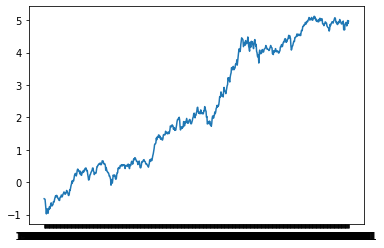

In [6]:
plt.plot(dat.Date, np.log(dat['Adj Close']));

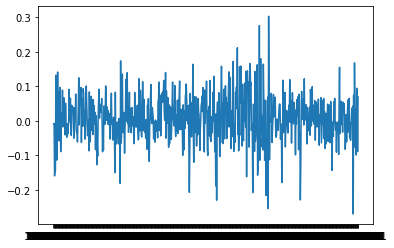

In [7]:
plt.plot(dat.Date, np.log(dat['Adj Close']).diff(1));

In [8]:
or_temp = pd.read_csv(f'{DATA}/or_monthly_mean_temp_1895-2019.csv', 
                      parse_dates=True)
or_temp.head()

,Date,Value,Anomaly
0,189501,26.8,-3.4
1,189502,31.8,-2.3
2,189503,35.1,-3.2
3,189504,44.2,0.3
4,189505,49.3,-1.2


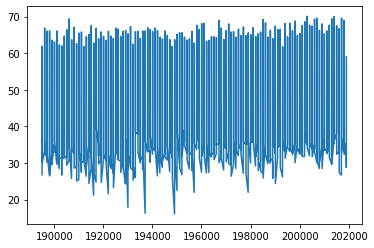

In [9]:
plt.plot(or_temp.Date, or_temp.Value);

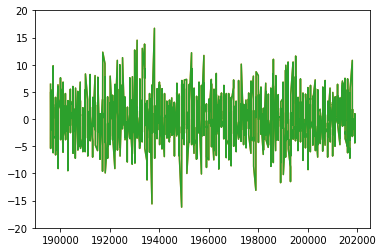

In [10]:
seas_diff = or_temp.diff(12)
plt.plot(or_temp.Date, seas_diff)
plt.ylim([-20, 20]);

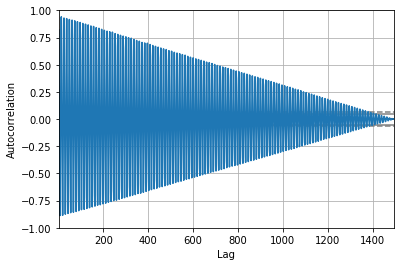

In [13]:
acf(or_temp.Value);

In [26]:
_, _, _, pvals = stattools.acf(
    or_temp.Value, unbiased=True, nlags=10, qstat=True, alpha=0.05)
pvals

AttributeError: module 'stattools' has no attribute 'acf'